# Load the datset

In [32]:
import pandas as pd
data=pd.read_csv('/content/Electric_cars_dataset(1).csv')

#Import the necesaary libraries

In [60]:
from sklearn.svm import SVC, LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 3. For splitting data
from sklearn.model_selection import train_test_split

# 4. For scaling features (very important for SVM)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# 5. For evaluating performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# 1. Import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

##EDA(EXPLATORY DATA ANALYSIS)

In [34]:
data.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [35]:
data.tail()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,156575107,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,27.0,211048701,POINT (-122.443211 47.252172),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.3
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,135543411,POINT (-122.367721 47.639264),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,46.0,192459907,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.7
64352,EV11120,1N4BZ1CP8K,Lewis,TOLEDO,WA,98591.0,2019.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,20.0,477551595,POINT (-122.800917 46.444012),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,35


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [37]:
data.describe(include='all')

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV11120,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


#Handle missing value

In [38]:
data.isnull().sum()

,0
ID,0
VIN (1-10),0
County,4
City,9
State,11
ZIP Code,6
Model Year,7
Make,4
Model,13
Electric Vehicle Type,0


| **Column**             | **Missing Count** | **Type**    | **Suggested Handling**                             |
| ---------------------- | ----------------- | ----------- | -------------------------------------------------- |
| `County`               | 4                 | Categorical | Fill with most frequent                            |
| `City`                 | 9                 | Categorical | Fill with most frequent                            |
| `State`                | 11                | Categorical | Fill with most frequent                            |
| `ZIP Code`             | 6                 | Numerical   | Fill with mode (most common) or drop               |
| `Model Year`           | 7                 | Numerical   | Fill with median or mode                           |
| `Make`                 | 4                 | Categorical | Fill with most frequent                            |
| `Model`                | 13                | Categorical | Fill with most frequent                            |
| `Legislative District` | 169               | Numerical   | Fill with median or mode, or drop if not important |
| `Vehicle Location`     | 510               | Location    | ⚠️ High — consider dropping this column            |
| `Electric Utility`     | 722               | Categorical | ⚠️ High — consider dropping this column            |


Solviing the missibg values

In [39]:
# Fill categorical with mode
for col in ['County', 'City', 'State', 'Make', 'Model']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill numeric with median
data['Model Year'] = data['Model Year'].fillna(data['Model Year'].median())
data['ZIP Code'] = data['ZIP Code'].fillna(data['ZIP Code'].mode()[0])
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District'].median())

# Drop columns with too many missing values
data = data.drop(columns=['Vehicle Location', 'Electric Utility'])

##Duplicates

In [40]:
data.duplicated().sum()

np.int64(0)

#Handling outliers if they exist

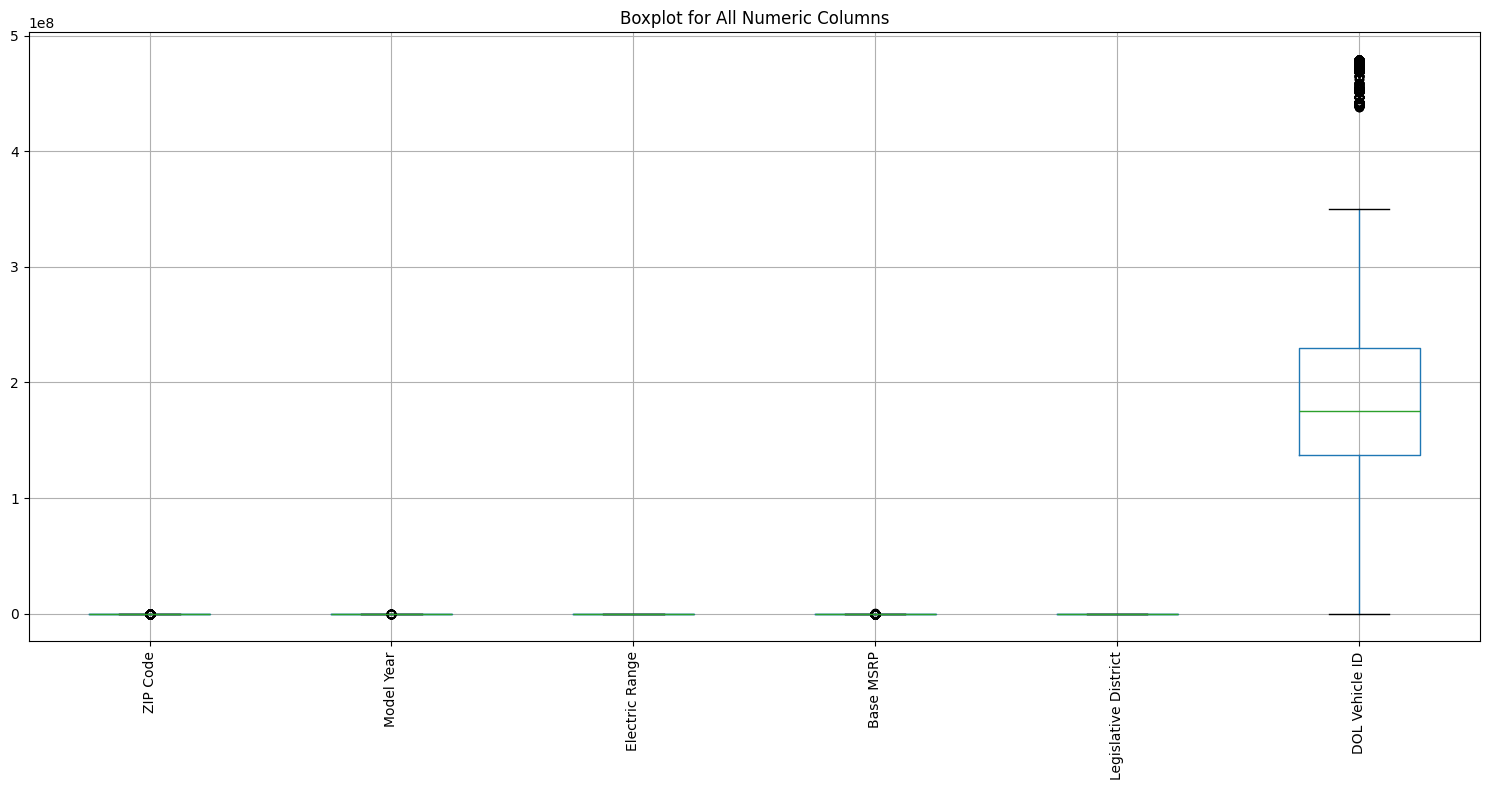

In [41]:
# Visualize the outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 8))

# Plot boxplots
data[numeric_cols].boxplot(rot=90)
plt.title('Boxplot for All Numeric Columns')
plt.tight_layout()
plt.show()

In [42]:
data['Expected Price ($1k)'] = pd.to_numeric(data['Expected Price ($1k)'], errors='coerce')
outliers = detect_outliers_iqr(data, 'Expected Price ($1k)')
print(outliers)

            ID  VIN (1-10)     County            City State  ZIP Code  \
112    EV27432  WA1LAAGE7N       King        BELLEVUE    WA   98004.0   
157    EV21809  5YJSA1E24M       King        ISSAQUAH    WA   98029.0   
211    EV68984  5YJSA1E59M     Pierce          TACOMA    WA   98422.0   
386     EV5317  5YJSA1E62M  Snohomish         BOTHELL    WA   98012.0   
452    EV70318  5YJSA1E61M     Pierce         BUCKLEY    WA   98321.0   
...        ...         ...        ...             ...   ...       ...   
63292  EV90039  5YJSA1E57M       King         REDMOND    WA   98052.0   
63377  EV43521  5YJSA1E62M      Clark      RIDGEFIELD    WA   98642.0   
63707  EV26405  5YJSA1E51M       King         SEATTLE    WA   98115.0   
63984  EV36569  5YJSA1E52M    Spokane  SPOKANE VALLEY    WA   99212.0   
64156  EV14197  5YJSA1E50M       King   MERCER ISLAND    WA   98040.0   

       Model Year   Make    Model           Electric Vehicle Type  \
112        2022.0   AUDI   E-TRON  Battery Electric Ve

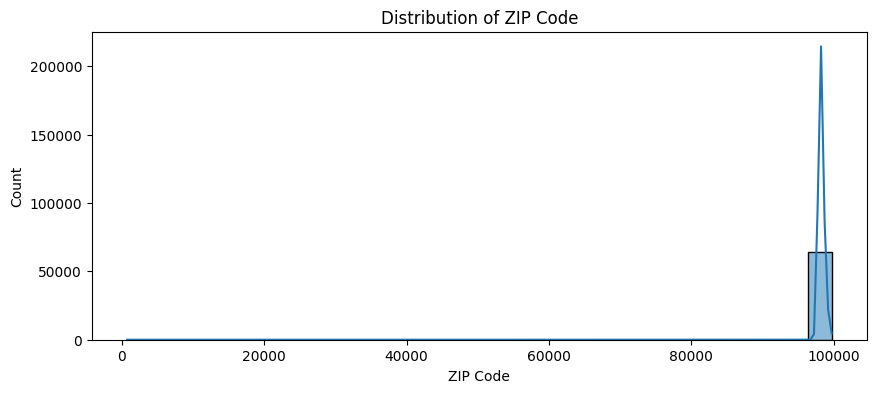

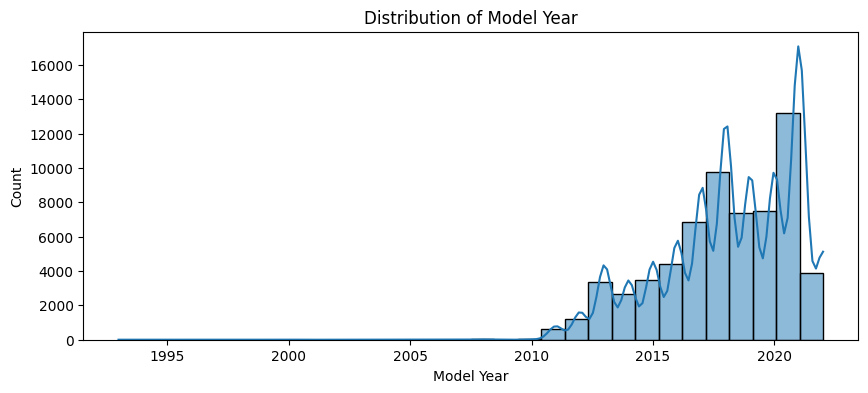

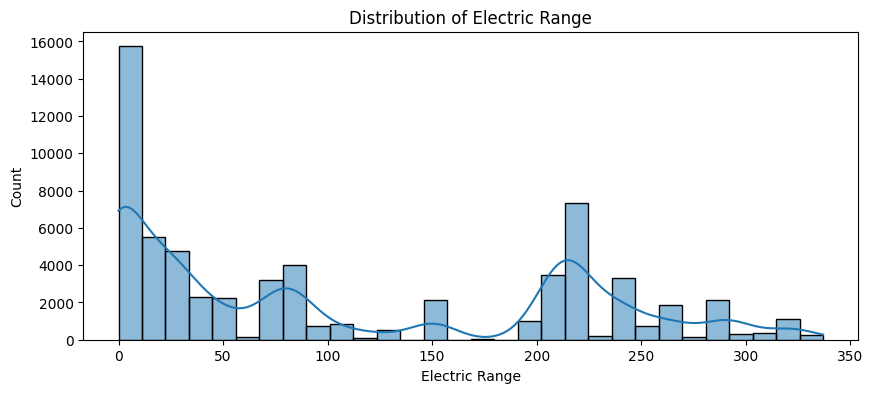

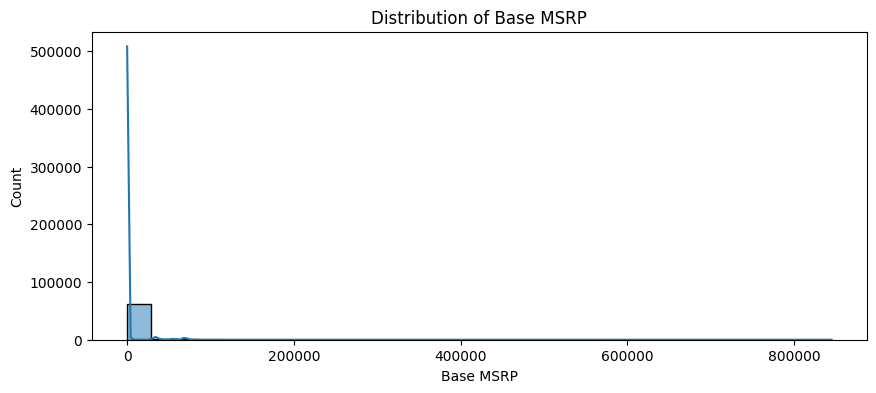

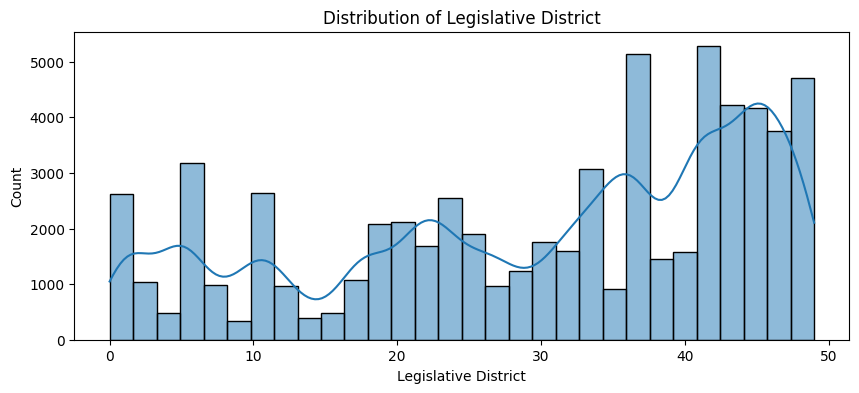

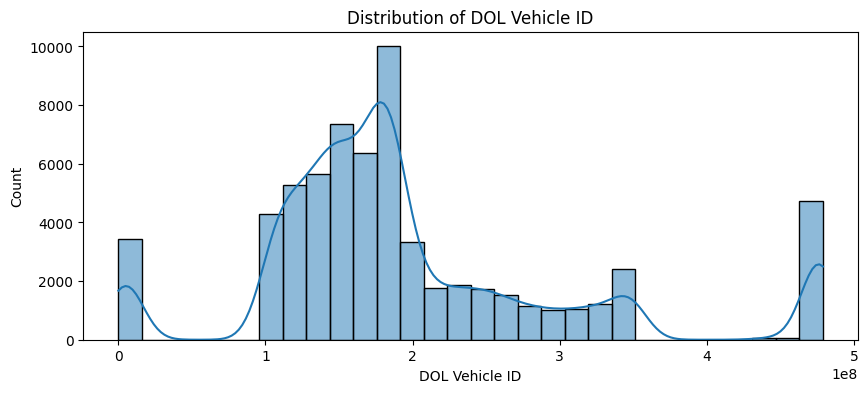

In [43]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


##ENCODING

In [46]:
columns_to_drop = [
    'ID',
    'VIN (1-10)',
    'DOL Vehicle ID',
    'City'  # optional
]

data = data.drop(columns=columns_to_drop)

#Identify the catgorical data

In [47]:
# Identify all object (categorical) columns
cat_cols = data.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)


Categorical columns:
 Index(['County', 'State', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility'],
      dtype='object')


#Encoding using the label encoder

In [48]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Encode each categorical column
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

#Print the data

In [49]:
data.head()

,County,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Expected Price ($1k)
0,120,35,98037.0,2020.0,28,57,0,0,308,0,32.0,50.00
1,118,35,98229.0,2011.0,22,53,0,0,73,0,40.0,15.00
2,95,35,98422.0,2015.0,3,45,0,0,81,0,27.0,18.00
3,60,35,98053.0,2013.0,5,96,1,0,38,0,45.0,33.90
4,95,35,98375.0,2019.0,5,15,0,0,238,0,25.0,41.78


In [50]:
data.columns

Index(['County', 'State', 'ZIP Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Expected Price ($1k)'],
      dtype='object')

In [51]:
#print the overview
data[cat_cols].head()

,County,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,120,35,28,57,0,0
1,118,35,22,53,0,0
2,95,35,3,45,0,0
3,60,35,5,96,1,0
4,95,35,5,15,0,0


## 2. SELECT TARGET VARIABLE AND THE FEATURES

Target variable

In [52]:
#the targer willl beExpected Price ($1k)
target = 'Expected Price ($1k)'

Feature columns

In [53]:
features = [
    'County',
    'State',
    'ZIP Code',
    'Model Year',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Range',
    'Base MSRP'
]


In [54]:
X = data[features]   # Features
y = data[target]     # Target


##3.SPLLIT YOUR DATSET TO TRAINING YOUR DATASET AND TRAIN TEST IT

In [55]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test, 80% train
    random_state=42       # For reproducibility
)

## 4. BUILD AND TRAIN THE SVM MODEL

In [61]:
# Replace invalid missing value patterns with np.nan
X.replace(['N/', 'n/a', 'N/A', '', ' '], np.nan, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
#Train the SVM model
from sklearn.svm import SVR

# Initialize the model
svm_model = SVR(kernel='rbf')  # You can also try 'linear', 'poly'

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVR()

#Access the model

In [65]:
import numpy as np

# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Evaluation Results:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Model Evaluation Results:
MAE  = 5.51
MSE  = 214.48
RMSE = 14.65
R²   = 0.67


In [58]:
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

Missing values in y_train: 9
Missing values in y_test: 4


In [66]:
print(X_train.dtypes)

County                                                 int64
State                                                  int64
ZIP Code                                             float64
Model Year                                           float64
Make                                                   int64
Model                                                  int64
Electric Vehicle Type                                  int64
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int64
Electric Range                                         int64
Base MSRP                                              int64
dtype: object


## VISUALIZATION AND SOLVING PROBLEM ISSUES LINK
https://gamma.app/docs/Predicting-Electric-Vehicle-Resale-Value-Using-Machine-Learning-n27iyocfk59ifuy

1️⃣ Market & Customer Behavior

    Market Segmentation
    Which electric vehicle types (BEVs vs. PHEVs) offer the highest resale value, and how can dealers target these segments?

    Customer Segmentation
    Which customer regions or demographics (e.g., by County or Electric Utility) show different pricing behaviors?

    Upselling Opportunities
    Which makes (e.g., Tesla, Nissan) with moderate prices have the highest potential for upselling premium features?

2️⃣ Pricing Strategy & Optimization

    Pricing Strategy
    How does Electric Range influence resale price, and how should manufacturers adjust pricing?

    Profit Maximization
    How can manufacturers adjust MSRP for models with high predicted resale value to maximize margins?

    Customer Education
    Which vehicles have low range but high prices — indicating the need to educate customers on value?

3️⃣ Risk & Credit Analysis

    Risk Management
    Are there vehicles with high Base MSRP but low predicted resale value — posing risk to dealerships?

    Credit Risk Assessment
    Do high CAFV-eligible vehicles show price volatility that could impact financing risks?

4️⃣ Sales & Inventory Planning

    Sales Optimization
    Which Model Year vehicles offer the best price-to-range ratio for pushing sales?

    Inventory Planning
    Which States or ZIP Codes show the highest demand for expensive EVs, helping guide stock allocation?

# MARKET AND  CUSTOMER BEHAIVOUR

#Market segementation

/tmp/ipython-input-68-3574198745.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/tmp/ipython-input-68-3574198745.py:43: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


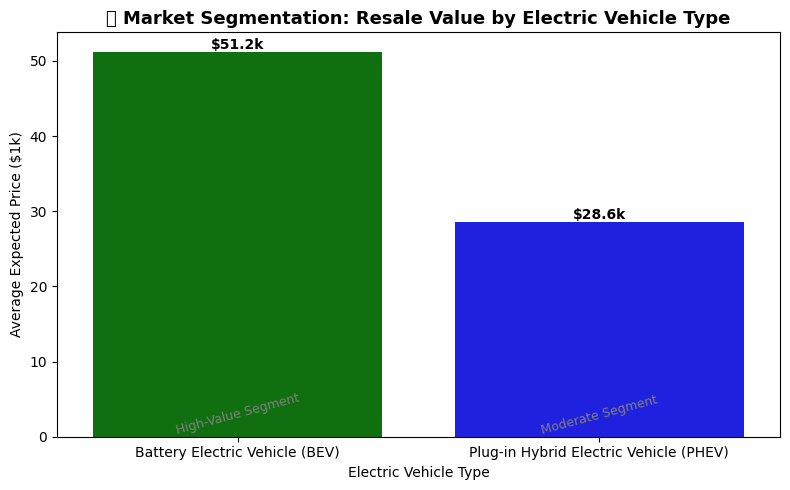

In [68]:
#Market Segmentation
#Which electric vehicle types (BEVs vs. PHEVs) offer the highest resale value, and how can dealers target these segments?
# Group by vehicle type and calculate average resale value
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Grouping the data
type_avg_price = data.groupby('Electric Vehicle Type')['Expected Price ($1k)'].mean().sort_values(ascending=False)

# Map the integer labels back to original string values
# Assuming 0 maps to 'Battery Electric Vehicle (BEV)' and 1 maps to 'Plug-in Hybrid Electric Vehicle (PHEV)'
label_map = {0: 'Battery Electric Vehicle (BEV)', 1: 'Plug-in Hybrid Electric Vehicle (PHEV)'}
mapped_labels = [label_map[label] for label in type_avg_price.index]

# Step 2: Define custom color palette using mapped labels
colors = ['green' if 'BEV' in label else 'blue' for label in mapped_labels]

# Step 3: Plot
plt.figure(figsize=(8, 5))
bars = sns.barplot(
    x=mapped_labels, # Use mapped_labels for x-axis
    y=type_avg_price.values,
    palette=colors
)

# Step 4: Add value labels and segment labels
for i, bar in enumerate(bars.patches):
    price = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    label = mapped_labels[i] # Use mapped_labels for annotation

    # Add price label
    bars.annotate(f"${price:.1f}k", (x, price), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    # Add segment label below each bar
    segment = "High-Value Segment" if 'BEV' in label else "Moderate Segment"
    bars.annotate(segment, (x, 0), ha='center', va='bottom', fontsize=9, color='gray', rotation=15)

# Step 5: Styling
plt.title('🔍 Market Segmentation: Resale Value by Electric Vehicle Type', fontsize=13, weight='bold')
plt.ylabel('Average Expected Price ($1k)')
plt.xlabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

#customer Segmentation

/tmp/ipython-input-79-723047876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


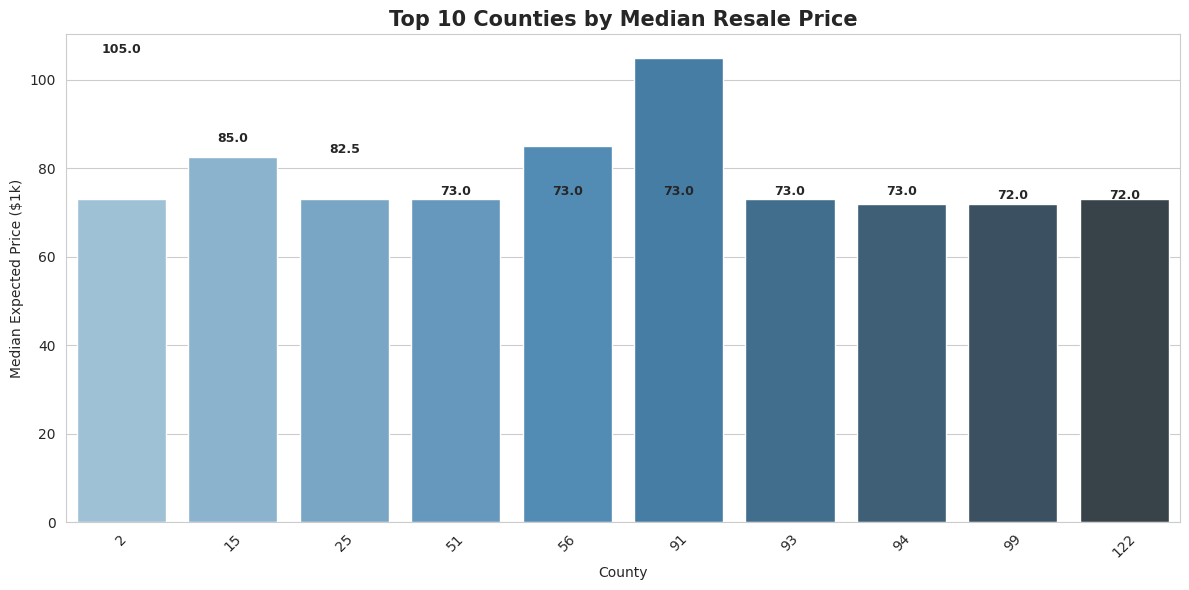

In [79]:
top_10 = county_medians.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10.index,
    y=top_10.values,
    palette='Blues_d'
)

for i, val in enumerate(top_10.values):
    plt.text(i, val + 1, f'{val:.1f}', ha='center', fontsize=9, weight='bold')

plt.title('Top 10 Counties by Median Resale Price', fontsize=15, weight='bold')
plt.ylabel('Median Expected Price ($1k)')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder

# Assuming you used this before
le = LabelEncoder()
data['Make_original'] = le.fit_transform(data['Make'])  # this is what probably created the number column

# To decode:
decoded_labels = dict(zip(le.transform(le.classes_), le.classes_))
print(decoded_labels)


{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33)}


In [75]:
make_avg = data.groupby('Make')['Expected Price ($1k)'].mean().sort_values(ascending=False)
print(make_avg.round(1).head(15))


Make
7     600.0
2      90.0
24     81.0
16     68.4
25     68.0
28     67.1
13     59.5
23     59.4
17     50.8
0      48.9
32     46.5
9      40.0
14     39.9
3      35.8
19     34.4
Name: Expected Price ($1k), dtype: float64


In [76]:
rename_dict = {
    0: 'Volkswagen',
    1: 'Polestar',
    2: 'BMW',
    3: 'Mazda',
    4: 'Porsche',
    5: 'Fiat',
    6: 'Cadillac',
    7: 'Tesla',
    8: 'Subaru',
    9: 'Toyota',
    10: 'Honda',
    11: 'Buick',
    12: 'Chrysler',
    13: 'Lucid',
    14: 'Volvo',
    15: 'Genesis',
    16: 'Nissan',
    17: 'Kia',
    18: 'Ram',
    19: 'Jeep',
    20: 'GMC',
    21: 'Mitsubishi',
    22: 'Land Rover',
    23: 'Rivian',
    24: 'Hyundai',
    25: 'Chevrolet',
    26: 'Peugeot',
    27: 'Dodge',
    28: 'Ford',
    29: 'Lincoln',
    30: 'Suzuki',
    31: 'BYD',
    32: 'Mercedes',
    33: 'Mini'
}


In [77]:
# Apply the renaming
data['Make'] = data['Make'].replace(rename_dict)


# Customer segementaton

/tmp/ipython-input-80-723047876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


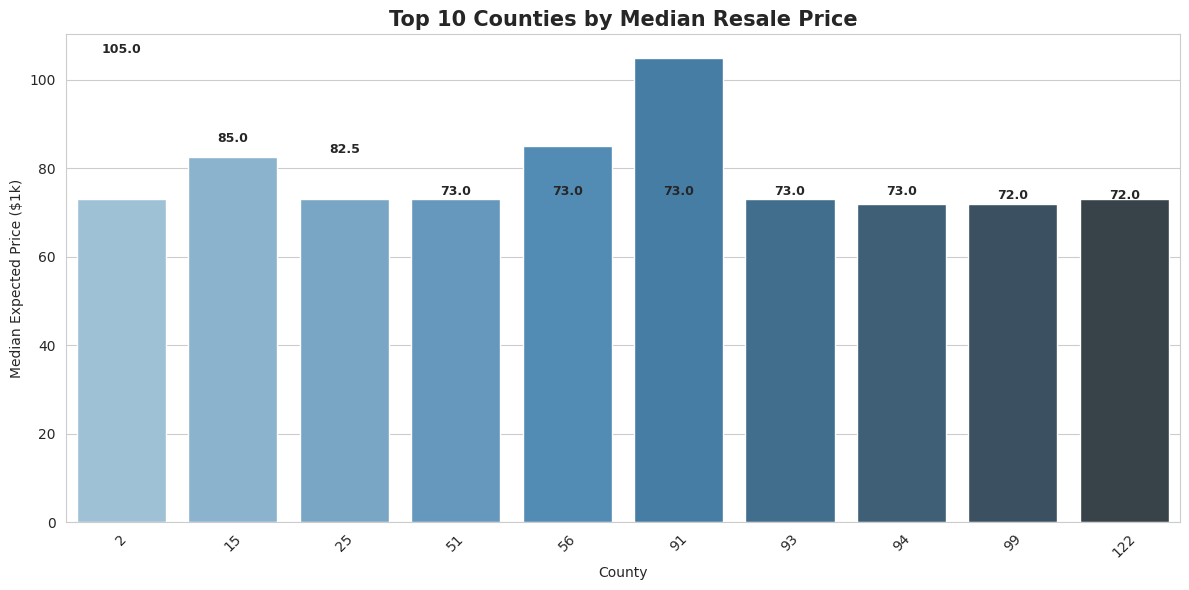

In [80]:
top_10 = county_medians.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10.index,
    y=top_10.values,
    palette='Blues_d'
)

for i, val in enumerate(top_10.values):
    plt.text(i, val + 1, f'{val:.1f}', ha='center', fontsize=9, weight='bold')

plt.title('Top 10 Counties by Median Resale Price', fontsize=15, weight='bold')
plt.ylabel('Median Expected Price ($1k)')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Upselling Opportunities
Which makes (e.g., Tesla, Nissan) with moderate prices have the highest potential for upselling premium features?

/tmp/ipython-input-78-427969008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


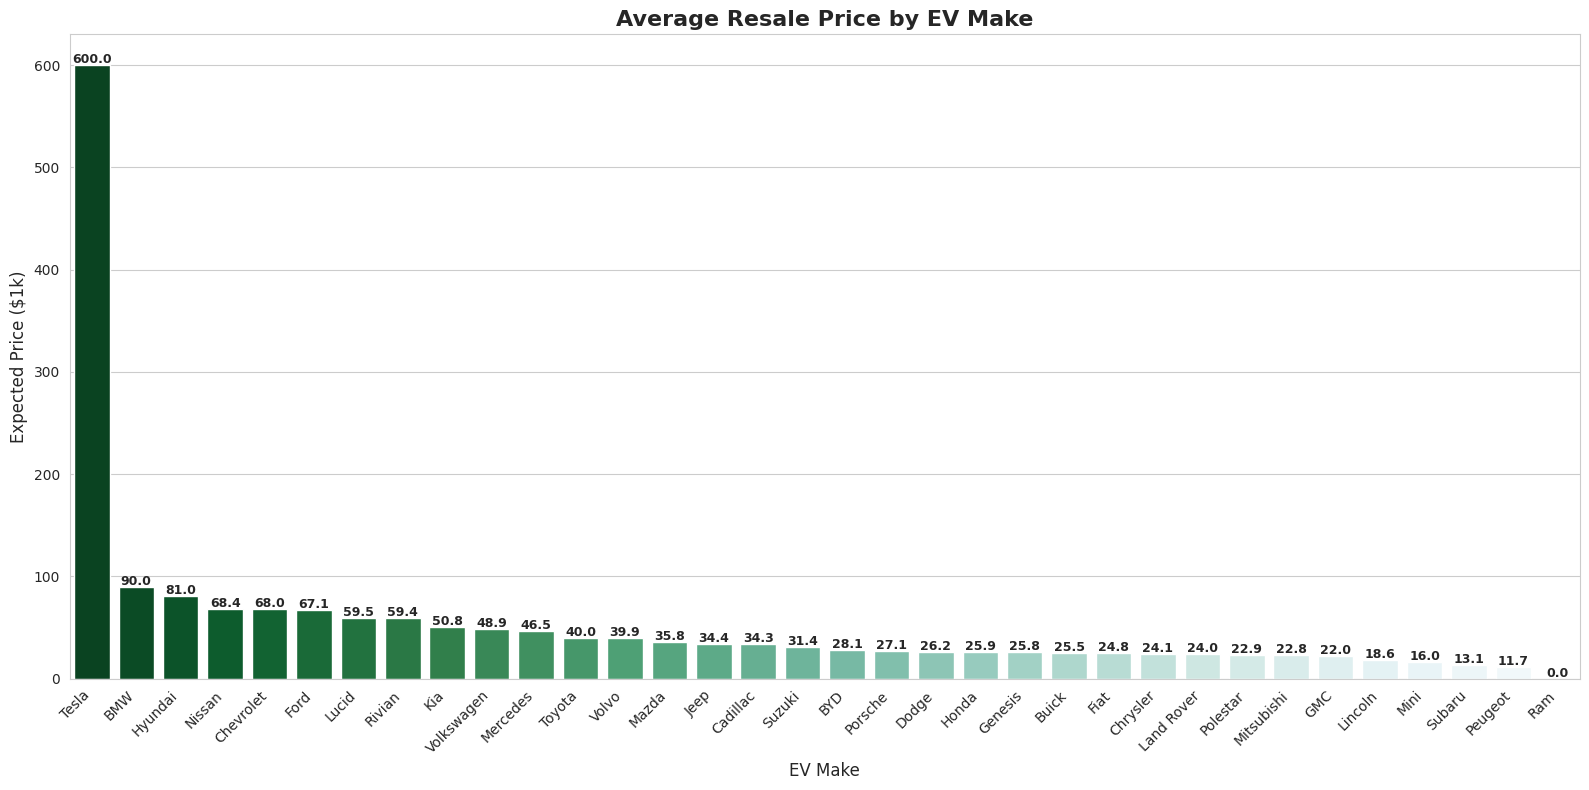

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Recalculate average resale value after renaming
make_avg = data.groupby('Make')['Expected Price ($1k)'].mean().sort_values(ascending=False)
make_avg_rounded = make_avg.round(1)

# Step 2: Bar chart visualization
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.barplot(
    x=make_avg_rounded.index,
    y=make_avg_rounded.values,
    palette='BuGn_r'  # Green = growth, revenue
)

# Add value labels
for i, val in enumerate(make_avg_rounded.values):
    plt.text(i, val + 2, f'{val:.1f}', ha='center', fontsize=9, weight='bold')

# Chart formatting
plt.title('Average Resale Price by EV Make', fontsize=16, weight='bold')
plt.xlabel('EV Make', fontsize=12)
plt.ylabel('Expected Price ($1k)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##2️⃣ Pricing Strategy & Optimization

Pricing Strategy

How does Electric Range influence resale price, and how should manufacturers adjust pricing?

Profit Maximization

How can manufacturers adjust MSRP for models with high predicted resale value to maximize margins?

Customer Education

Which vehicles have low range but high prices — indicating the need to educate customers on value?

#Pricing strategy

In [82]:
import pandas as pd

# Define bins and labels
bins = [0, 100, 150, 200, 250, 300, 350, 400, 500, 1000]
labels = ['0-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-500', '500+']

# Create range bins
data['Range Bin'] = pd.cut(data['Electric Range'], bins=bins, labels=labels)

# Calculate average expected price for each bin
range_price = data.groupby('Range Bin')['Expected Price ($1k)'].mean().round(1).reset_index()

# Display the table
print(range_price)

  Range Bin  Expected Price ($1k)
0     0-100                  25.8
1   101-150                  28.1
2   151-200                  46.2
3   201-250                  56.1
4   251-300                  62.6
5   301-350                  58.2
6   351-400                   NaN
7   401-500                   NaN
8      500+                   NaN


/tmp/ipython-input-82-1637103406.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_price = data.groupby('Range Bin')['Expected Price ($1k)'].mean().round(1).reset_index()


/tmp/ipython-input-83-116033718.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_price = data.groupby('Range Bin')['Expected Price ($1k)'].mean().reset_index()


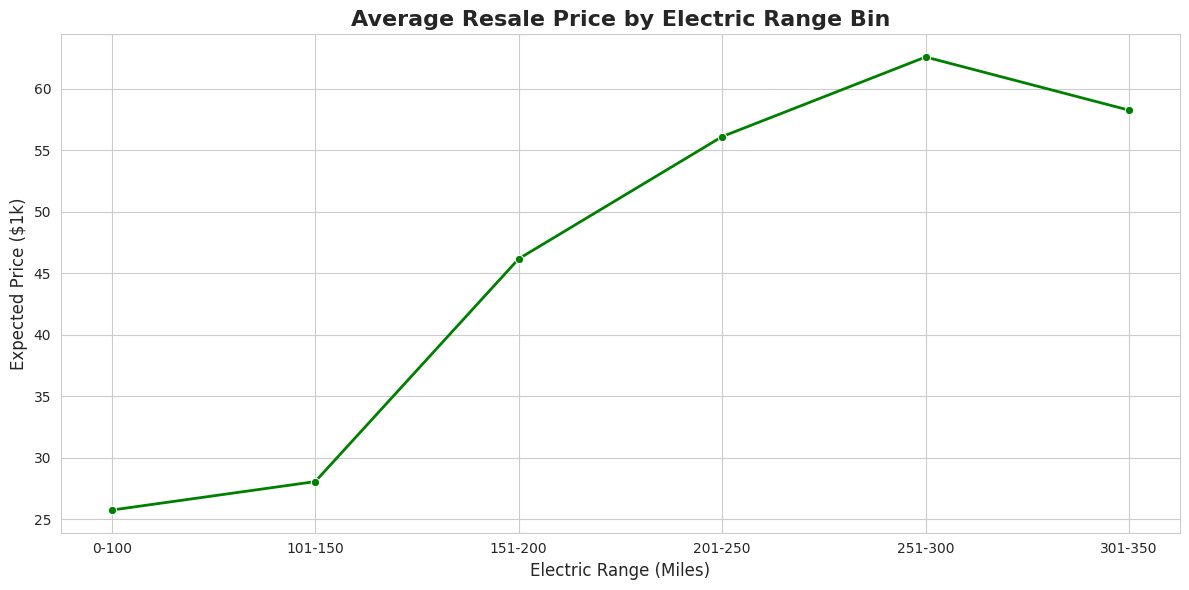

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create range bins
bins = [0, 100, 150, 200, 250, 300, 350, 400, 500, 1000]
labels = ['0-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-500', '500+']
data['Range Bin'] = pd.cut(data['Electric Range'], bins=bins, labels=labels)

# 2. Group and calculate average expected price per bin
range_price = data.groupby('Range Bin')['Expected Price ($1k)'].mean().reset_index()

# 3. Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=range_price,
    x='Range Bin',
    y='Expected Price ($1k)',
    marker='o',
    linewidth=2,
    color='green'
)

plt.title('Average Resale Price by Electric Range Bin', fontsize=16, weight='bold')
plt.xlabel('Electric Range (Miles)', fontsize=12)
plt.ylabel('Expected Price ($1k)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

##Profit Maximization

How can manufacturers adjust MSRP for models with high predicted resale value to maximize margins?

Make
Tesla         600.0
BMW            90.0
Hyundai        73.5
Nissan         68.4
Chevrolet      68.0
Ford           64.1
Lucid          59.5
Rivian         59.4
Kia            50.8
Volkswagen     48.9
Name: Profit Gap ($1k), dtype: float64


/tmp/ipython-input-84-1014460630.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_gap.head(10).index, y=profit_gap.head(10).values, palette='Blues_r')


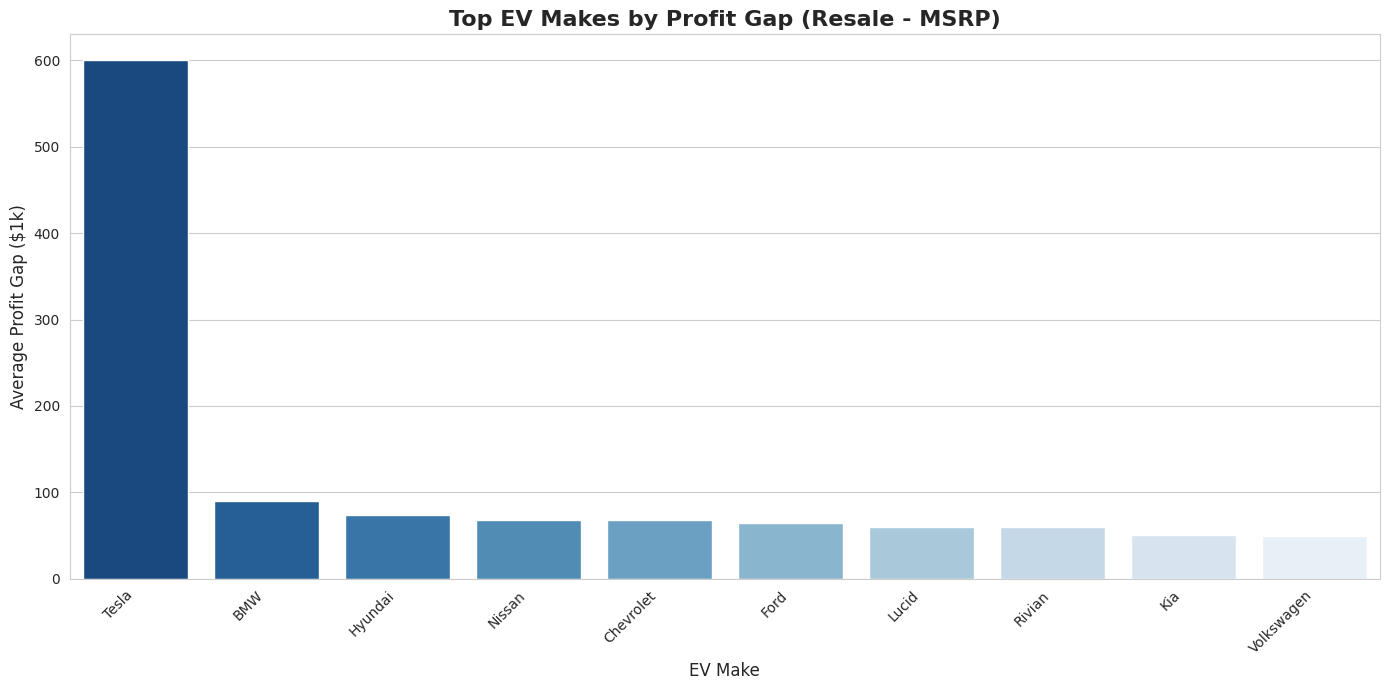

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute the profit gap
data['Profit Gap ($1k)'] = data['Expected Price ($1k)'] - (data['Base MSRP'] / 1000)

# Step 2: Average profit gap by Make
profit_gap = data.groupby('Make')['Profit Gap ($1k)'].mean().round(1).sort_values(ascending=False)

# Step 3: Display table for copy-paste
print(profit_gap.head(10))  # Top 10 brands with biggest profit gap

# Step 4: Visualization
plt.figure(figsize=(14, 7))
sns.barplot(x=profit_gap.head(10).index, y=profit_gap.head(10).values, palette='Blues_r')
plt.title('Top EV Makes by Profit Gap (Resale - MSRP)', fontsize=16, weight='bold')
plt.ylabel('Average Profit Gap ($1k)', fontsize=12)
plt.xlabel('EV Make', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#CuUSTOMER EDUCATION


In [85]:
# Filter vehicles with low range but high resale price
education_needed = data[(data['Electric Range'] < 150) & (data['Expected Price ($1k)'] > 50)]

# Group and count by Make
education_counts = education_needed['Make'].value_counts()

# Show table
print(education_counts)


Make
Ford          10145
Suzuki          458
Mazda           407
Hyundai         210
Volkswagen      125
Rivian           82
Mercedes         82
Kia              49
Chevrolet        26
Nissan           23
Subaru           20
Jeep             12
Lucid            10
Tesla             1
Honda             1
BMW               1
Name: count, dtype: int64


#visulas

/tmp/ipython-input-87-786626272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


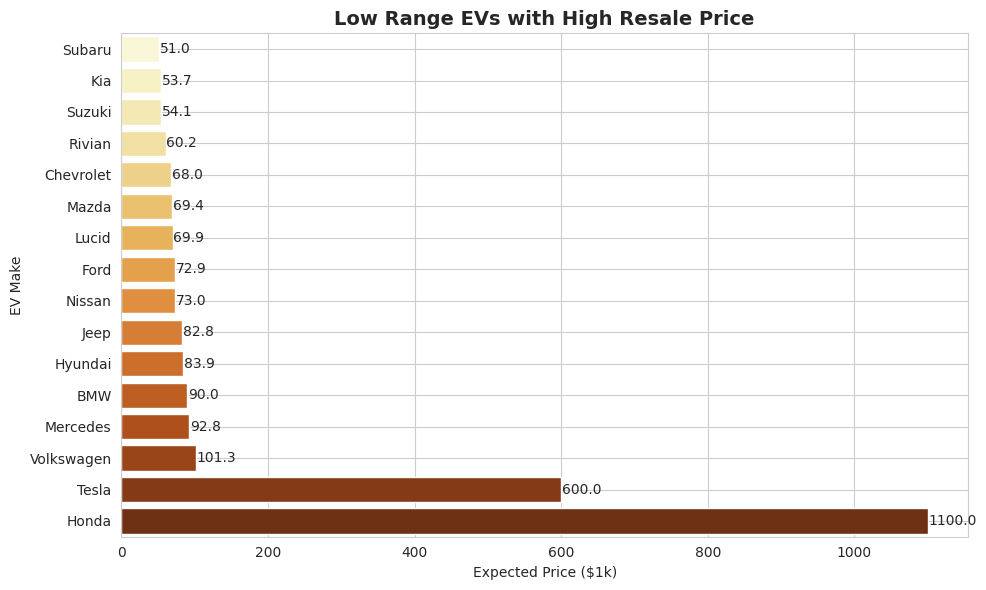

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter for low range & high price EVs
education_needed = data[(data['Electric Range'] < 150) & (data['Expected Price ($1k)'] > 50)]

# Step 2: Group and get average price by Make
edu_avg = education_needed.groupby('Make')['Expected Price ($1k)'].mean().sort_values()

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=edu_avg.values,
    y=edu_avg.index,
    palette='YlOrBr'
)

# Add value labels
for i, val in enumerate(edu_avg.values):
    plt.text(val + 1, i, f'{val:.1f}', va='center')

plt.title('Low Range EVs with High Resale Price', fontsize=14, weight='bold')
plt.xlabel('Expected Price ($1k)')
plt.ylabel('EV Make')
plt.grid(True)
plt.tight_layout()
plt.show()


##3️⃣ Risk & Credit Analysis
Risk Management

Are there vehicles with high Base MSRP but low predicted resale value — posing risk to dealerships?

Credit Risk Assessment

Do high CAFV-eligible vehicles show price volatility that could impact financing risks?

#Risk Managment

In [88]:
# Calculate risk as loss difference (MSRP - resale price)
data['Risk ($1k)'] = (data['Base MSRP'] / 1000) - data['Expected Price ($1k)']

# Filter for high MSRP but low resale value (risk over 30k)
high_risk = data[data['Risk ($1k)'] > 30]

# Group by Make and get average risk
risk_summary = high_risk.groupby('Make')['Risk ($1k)'].mean().round(1).sort_values(ascending=False)

# Display top 10 risky makes
print(risk_summary.head(10))


Make
Hyundai     104.4
Toyota       62.0
Mazda        46.8
Ford         38.5
Porsche      36.1
Mercedes     32.4
Name: Risk ($1k), dtype: float64


/tmp/ipython-input-89-897743566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


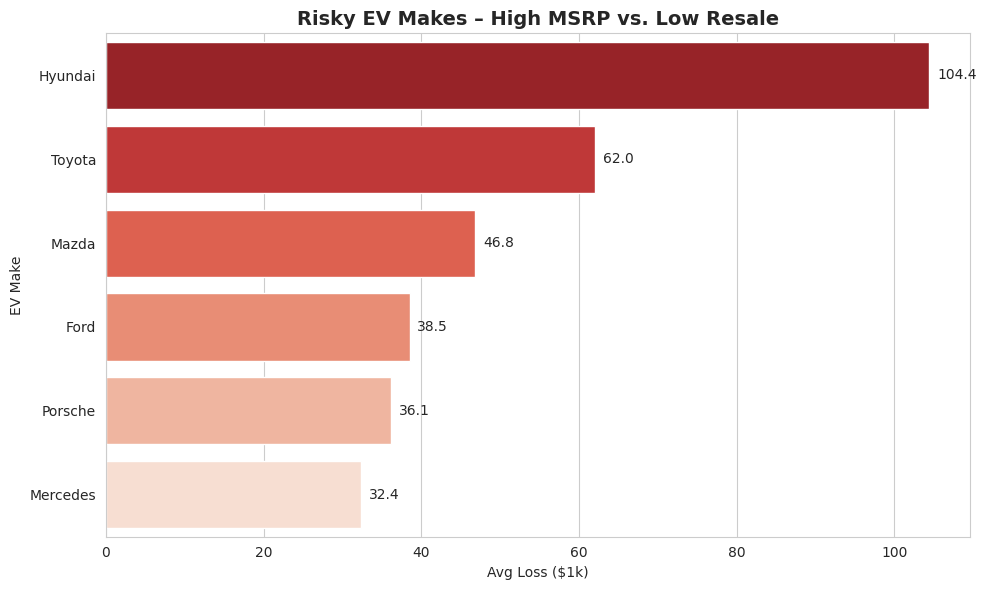

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top risky makes
plt.figure(figsize=(10, 6))
sns.barplot(
    x=risk_summary.head(10).values,
    y=risk_summary.head(10).index,
    palette='Reds_r'
)

# Add value labels
for i, val in enumerate(risk_summary.head(10).values):
    plt.text(val + 1, i, f'{val:.1f}', va='center')

plt.title('Risky EV Makes – High MSRP vs. Low Resale', fontsize=14, weight='bold')
plt.xlabel('Avg Loss ($1k)')
plt.ylabel('EV Make')
plt.tight_layout()
plt.show()


##Credit Risk Assessment

/tmp/ipython-input-90-3209007783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data,


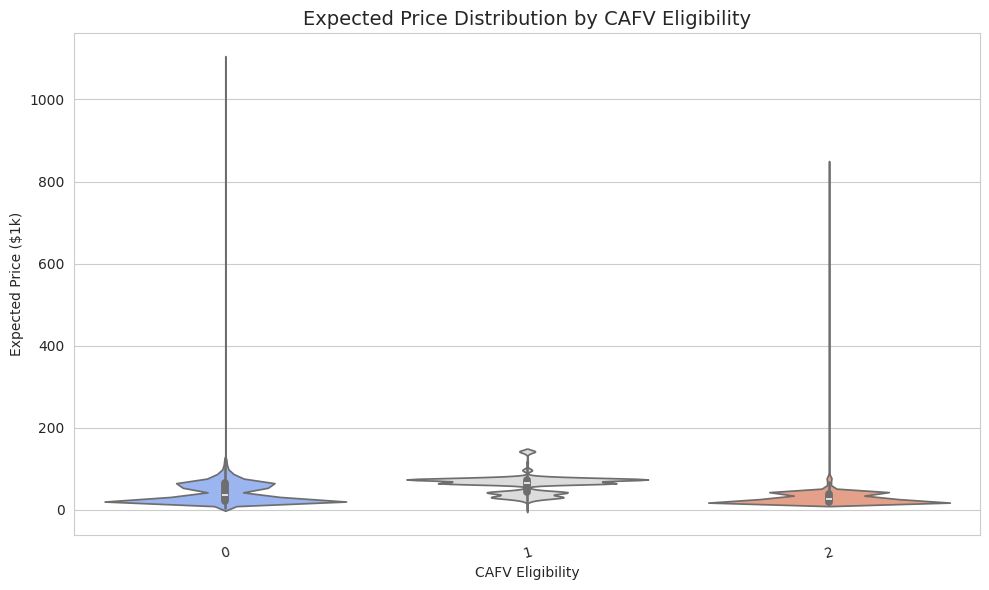

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=data,
               x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
               y='Expected Price ($1k)',
               palette='coolwarm')

plt.title('Expected Price Distribution by CAFV Eligibility', fontsize=14)
plt.xlabel('CAFV Eligibility')
plt.ylabel('Expected Price ($1k)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


/tmp/ipython-input-91-2422957199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,


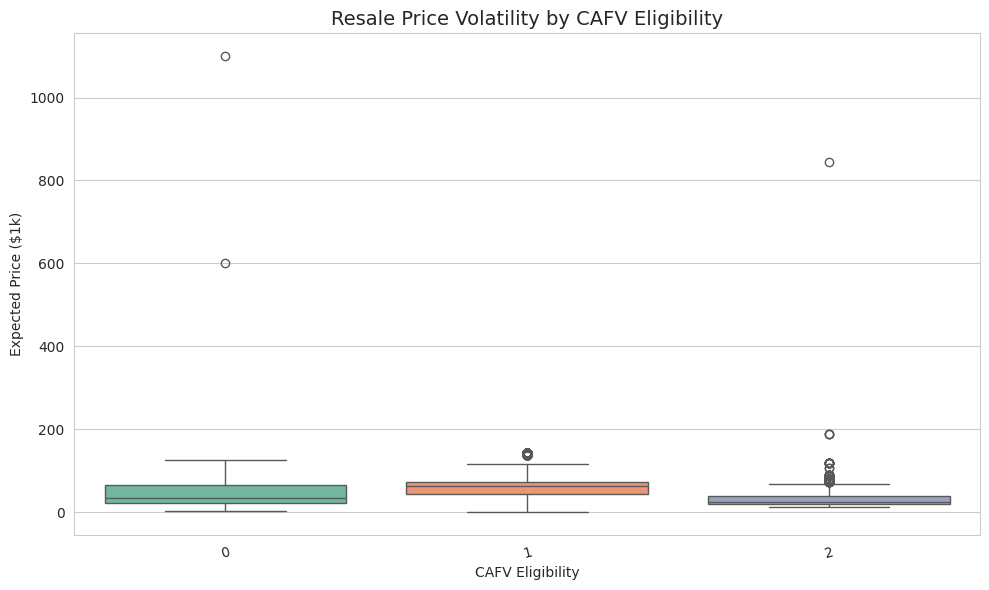

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,
            x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
            y='Expected Price ($1k)',
            palette='Set2')

plt.title('Resale Price Volatility by CAFV Eligibility', fontsize=14)
plt.xlabel('CAFV Eligibility')
plt.ylabel('Expected Price ($1k)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [92]:
data.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Expected Price ($1k)'].describe()


,count,mean,std,min,25%,50%,75%,max
Clean Alternative Fuel Vehicle (CAFV) Eligibility,,,,,,,,
0,39935.0,43.102753,24.007953,2.8,21.00,35.0,65.0,1100.0
1,14938.0,62.319001,21.591278,0.0,43.00,64.0,73.0,142.0
2,9467.0,28.720049,15.386788,13.3,18.86,25.0,39.0,845.0


## SALES AND NVENTORY PLANNING

In [94]:
data['Price_per_Mile'] = data['Expected Price ($1k)'] / data['Electric Range']


In [95]:
model_year_ratio = data.groupby('Model Year')['Price_per_Mile'].mean().reset_index()
model_year_ratio = model_year_ratio.sort_values('Price_per_Mile')


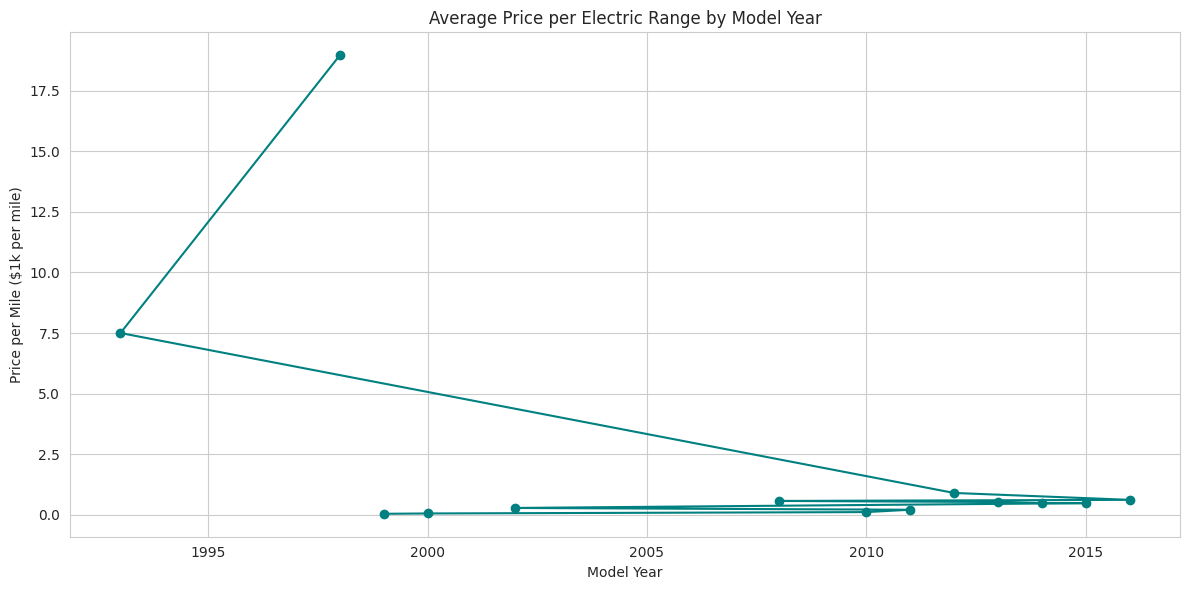

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(model_year_ratio['Model Year'], model_year_ratio['Price_per_Mile'], marker='o', color='teal')
plt.title('Average Price per Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price per Mile ($1k per mile)')
plt.grid(True)
plt.tight_layout()
plt.show()


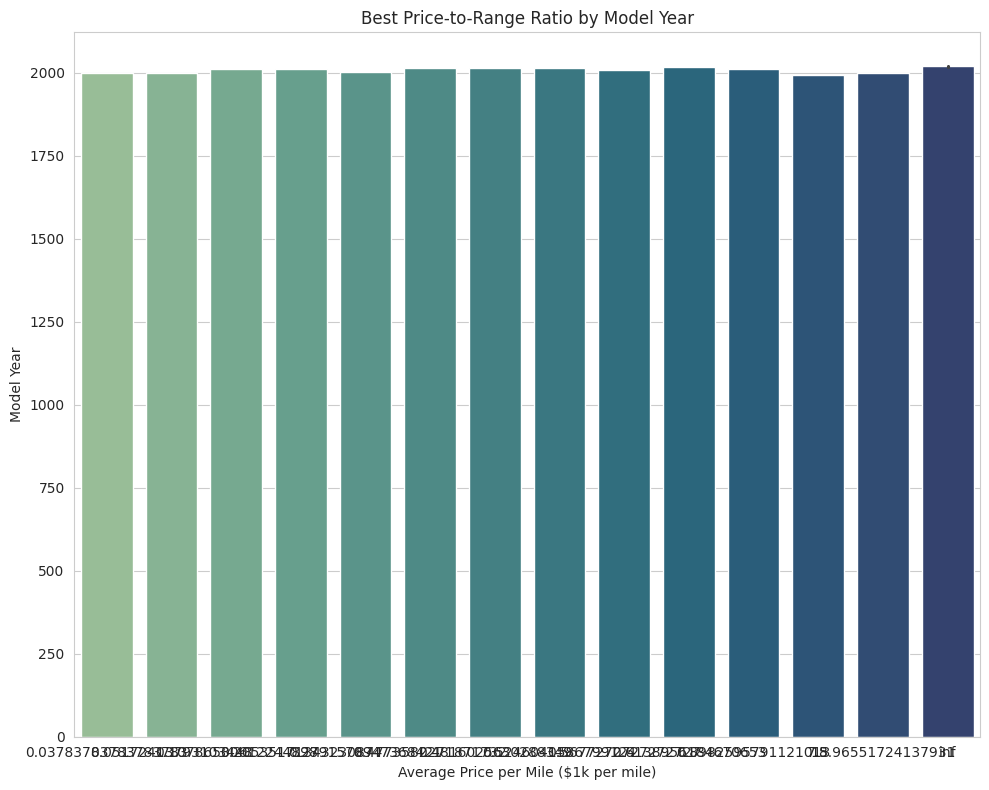

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate average price per mile by model year
model_ratio = data.groupby('Model Year')['Price_per_Mile'].mean().reset_index()
model_ratio = model_ratio.sort_values('Price_per_Mile', ascending=True)  # lower is better

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=model_ratio,
    y='Model Year',
    x='Price_per_Mile',
    palette='crest'
)
plt.title('Best Price-to-Range Ratio by Model Year')
plt.xlabel('Average Price per Mile ($1k per mile)')
plt.ylabel('Model Year')
plt.tight_layout()
plt.show()


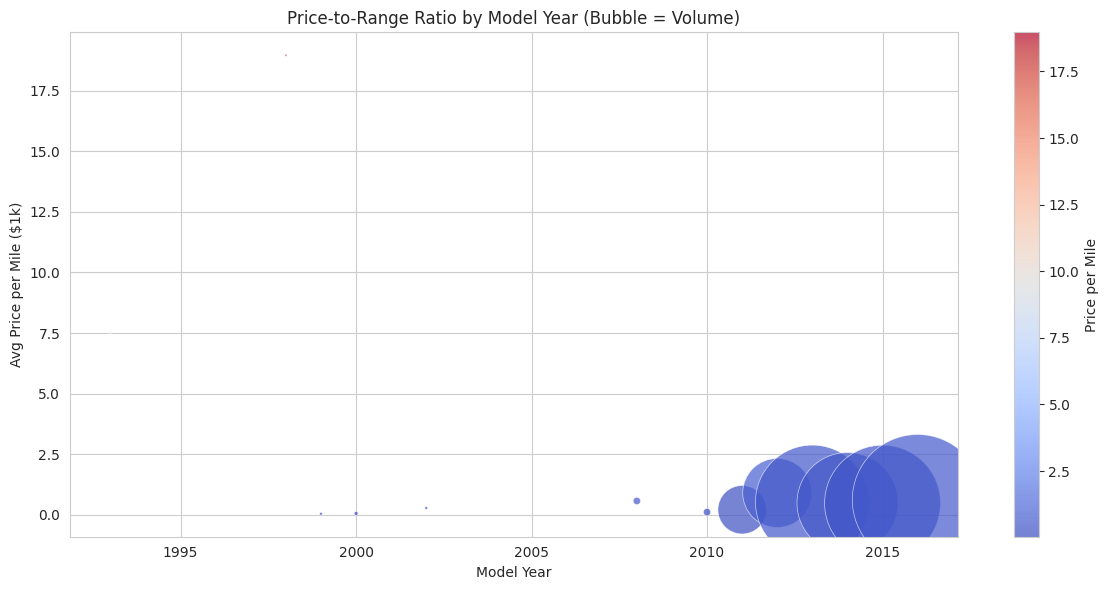

In [98]:
# Prepare data
summary = data.groupby('Model Year').agg({
    'Price_per_Mile': 'mean',
    'Electric Range': 'count'  # or any column to get count
}).reset_index().rename(columns={'Electric Range': 'Vehicle Count'})

# Bubble Plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    summary['Model Year'],
    summary['Price_per_Mile'],
    s=summary['Vehicle Count'] * 2,  # Bubble size
    c=summary['Price_per_Mile'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

plt.title('Price-to-Range Ratio by Model Year (Bubble = Volume)')
plt.xlabel('Model Year')
plt.ylabel('Avg Price per Mile ($1k)')
plt.colorbar(scatter, label='Price per Mile')
plt.grid(True)
plt.tight_layout()
plt.show()


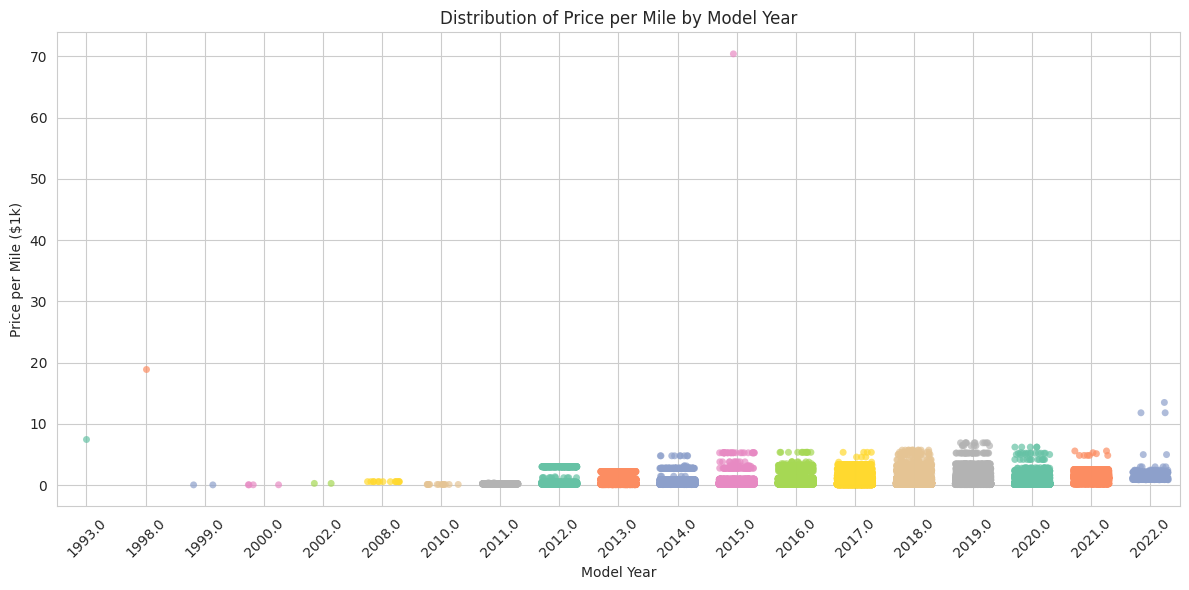

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=data,
    x='Model Year',
    y='Price_per_Mile',
    jitter=0.3,
    palette='Set2',
    alpha=0.7
)
plt.title('Distribution of Price per Mile by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price per Mile ($1k)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-100-1182582467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


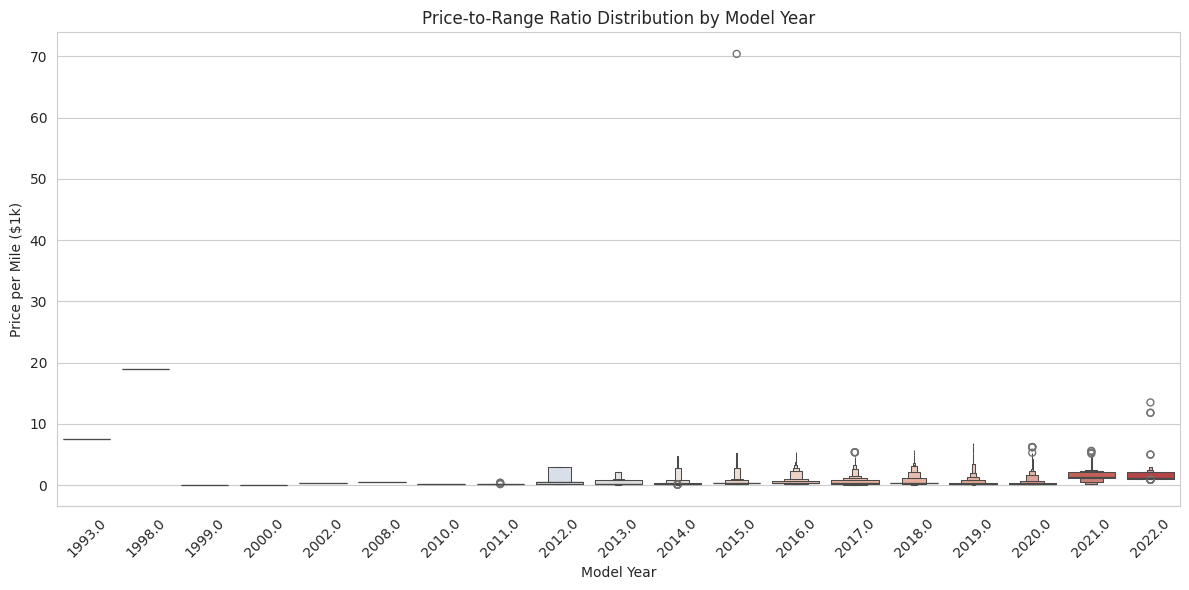

In [100]:
plt.figure(figsize=(12, 6))
sns.boxenplot(
    data=data,
    x='Model Year',
    y='Price_per_Mile',
    palette='coolwarm'
)
plt.title('Price-to-Range Ratio Distribution by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price per Mile ($1k)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [101]:
# Step 1: Create price-per-mile if not already created
data['Price_per_Mile'] = data['Expected Price ($1k)'] / data['Electric Range']

# Step 2: Group by Model Year and calculate mean ratio
model_year_summary = data.groupby('Model Year')['Price_per_Mile'].mean().reset_index()

# Step 3: Sort by best value (lowest first)
model_year_summary = model_year_summary.sort_values(by='Price_per_Mile')

# Step 4: Display nicely
print(model_year_summary)


    Model Year  Price_per_Mile
2       1999.0        0.037838
3       2000.0        0.051724
6       2010.0        0.107865
7       2011.0        0.205352
4       2002.0        0.279158
11      2015.0        0.477358
10      2014.0        0.481603
9       2013.0        0.524604
5       2008.0        0.567727
12      2016.0        0.613896
8       2012.0        0.898260
0       1993.0        7.500000
1       1998.0       18.965517
13      2017.0             inf
14      2018.0             inf
15      2019.0             inf
16      2020.0             inf
17      2021.0             inf
18      2022.0             inf


In [102]:
data['Price_per_Mile'].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Price_per_Mile'], inplace=True)


/tmp/ipython-input-102-3351661522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price_per_Mile'].replace([np.inf, -np.inf], np.nan, inplace=True)


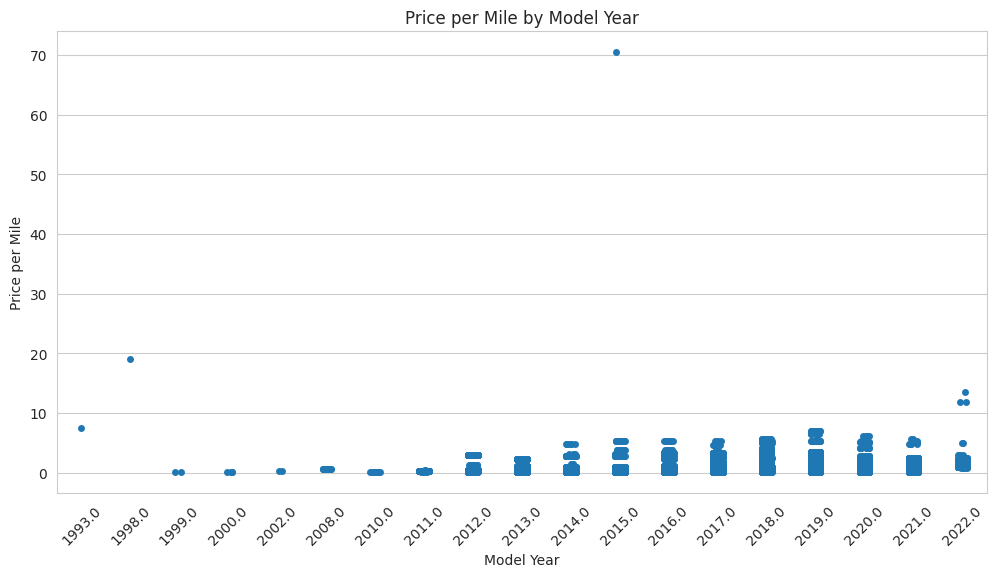

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.stripplot(data=data, x='Model Year', y='Price_per_Mile', jitter=True)
plt.xticks(rotation=45)
plt.title('Price per Mile by Model Year')
plt.ylabel('Price per Mile')
plt.show()


##Which States or ZIP Codes show the highest demand for expensive EVs?

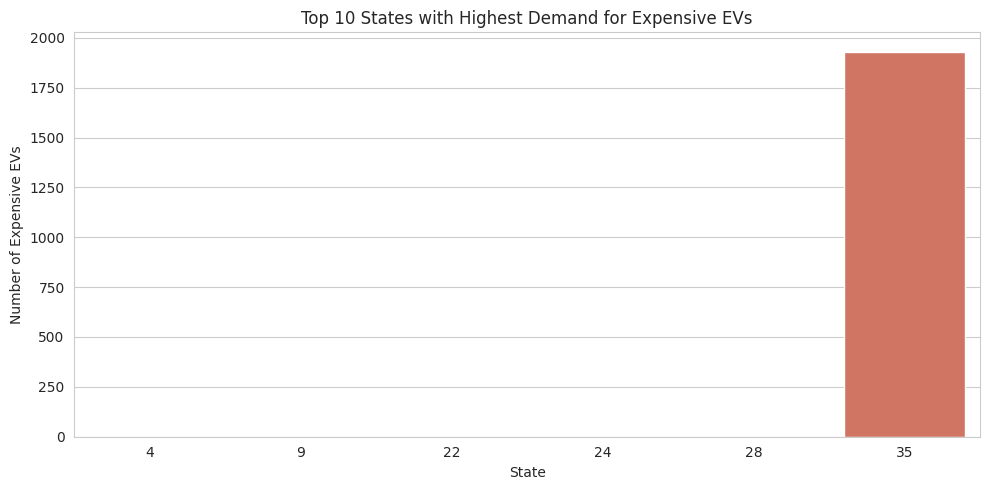

In [105]:
# Define threshold for 'expensive' EVs (e.g., over $80k resale)
threshold = 80

# Filter expensive EVs
expensive_ev = data[data['Expected Price ($1k)'] > threshold]

# Top 10 states with most expensive EVs
top_states = expensive_ev['State'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title('Top 10 States with Highest Demand for Expensive EVs')
plt.xlabel('State')
plt.ylabel('Number of Expensive EVs')
plt.tight_layout()
plt.show()


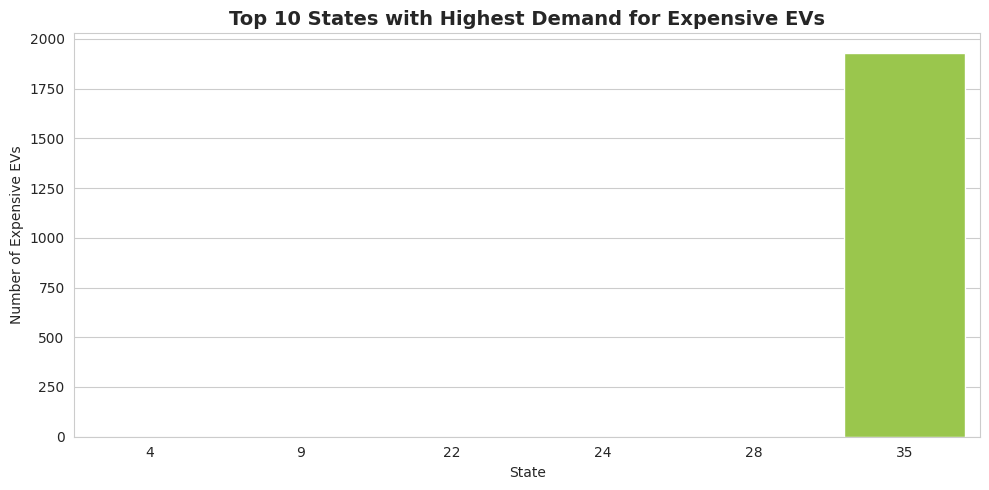

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold for expensive EVs (in $1k)
threshold = 80

# Filter dataset
expensive_ev = data[data['Expected Price ($1k)'] > threshold]

# Top 10 states by count of expensive EVs
top_states = expensive_ev['State'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 States with Highest Demand for Expensive EVs', fontsize=14, weight='bold')
plt.xlabel('State')
plt.ylabel('Number of Expensive EVs')
plt.tight_layout()
plt.show()


/tmp/ipython-input-107-115644951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zips.index.astype(str), y=top_zips.values, palette='magma')


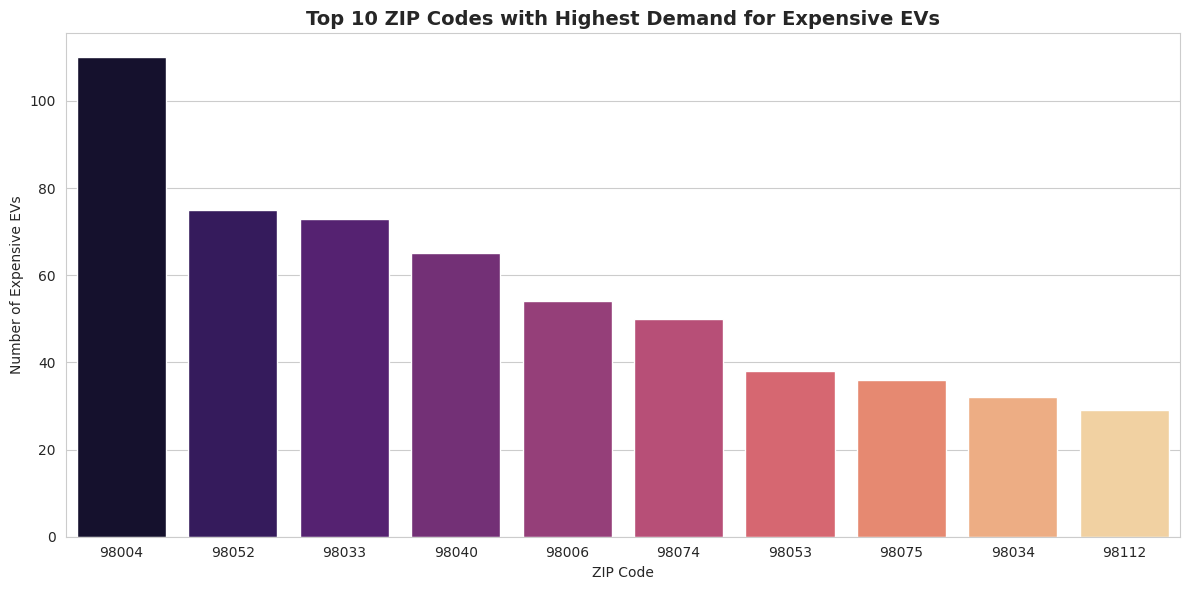

In [107]:
# Ensure ZIP Code is treated as int for grouping
expensive_ev['ZIP Code'] = expensive_ev['ZIP Code'].astype(int)

# Top 10 ZIP Codes
top_zips = expensive_ev['ZIP Code'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_zips.index.astype(str), y=top_zips.values, palette='magma')
plt.title('Top 10 ZIP Codes with Highest Demand for Expensive EVs', fontsize=14, weight='bold')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Expensive EVs')
plt.tight_layout()
plt.show()


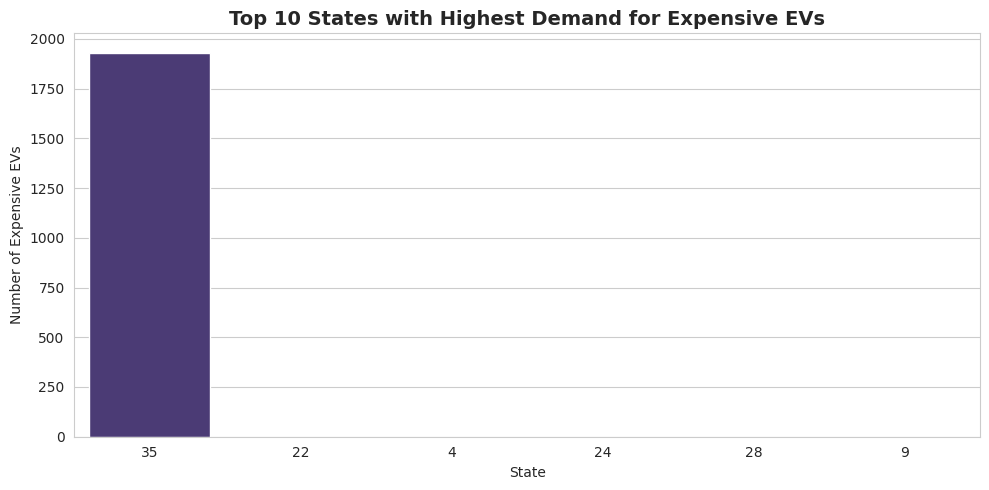

In [108]:
# Convert State to string to ensure proper labeling
data['State'] = data['State'].astype(str)

# Filter and get top 10 states
expensive_ev = data[data['Expected Price ($1k)'] > 80]
top_states = expensive_ev['State'].value_counts().head(10)

# Plot with proper labels
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 States with Highest Demand for Expensive EVs', fontsize=14, weight='bold')
plt.xlabel('State')
plt.ylabel('Number of Expensive EVs')
plt.tight_layout()
plt.show()


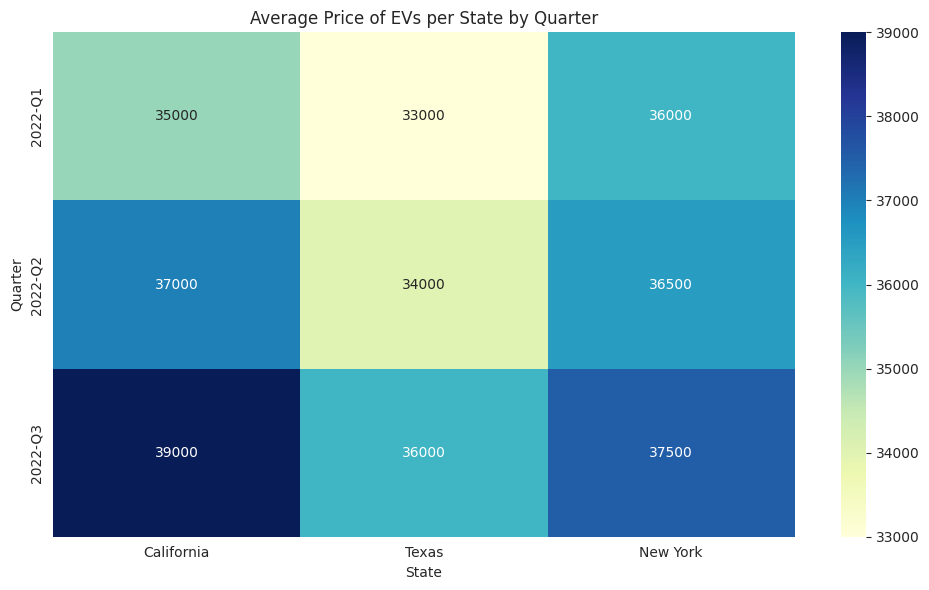

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample structure assuming you have relevant data loaded
# Let's say this is a pivoted dataframe showing EV counts or avg price per region/state/month
# Example business heatmap idea: Avg Price of EVs per State

# Simulated data for demonstration
heatmap_data = pd.DataFrame({
    'California': [35000, 37000, 39000],
    'Texas': [33000, 34000, 36000],
    'New York': [36000, 36500, 37500],
}, index=['2022-Q1', '2022-Q2', '2022-Q3'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price of EVs per State by Quarter")
plt.ylabel("Quarter")
plt.xlabel("State")
plt.tight_layout()
plt.show()


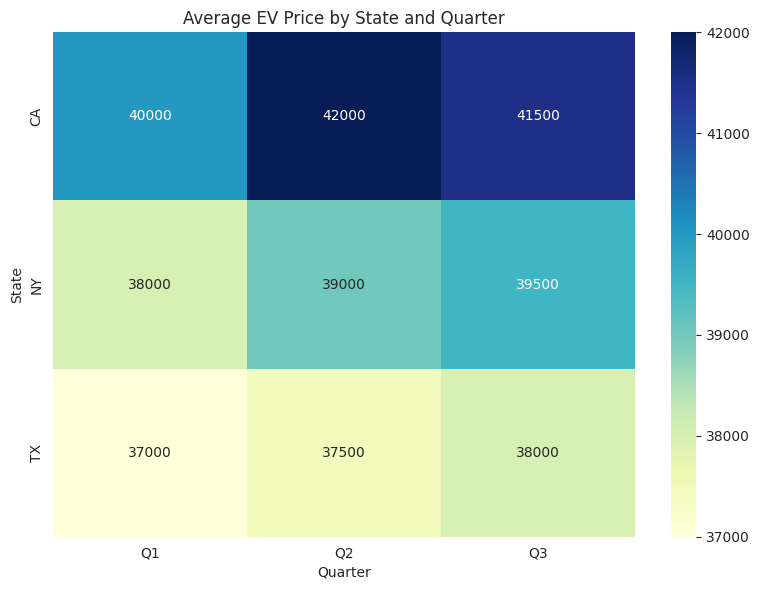

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample synthetic dataset (replace this with your real dataset)
data = {
    'State': ['CA', 'CA', 'CA', 'NY', 'NY', 'NY', 'TX', 'TX', 'TX'],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3'],
    'Avg_EV_Price': [40000, 42000, 41500, 38000, 39000, 39500, 37000, 37500, 38000]
}
df = pd.DataFrame(data)

# Pivot data for heatmap format
pivot_table = df.pivot(index='State', columns='Quarter', values='Avg_EV_Price')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average EV Price by State and Quarter")
plt.ylabel("State")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()


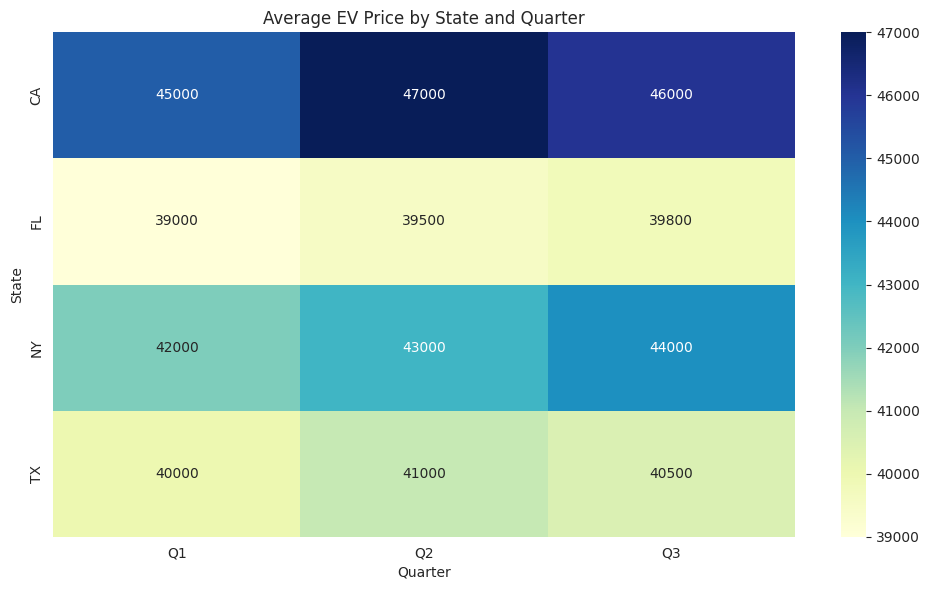

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframe setup - REPLACE with your actual dataframe
# Assuming 'State', 'Quarter', and 'Price' columns exist
data = {
    'State': ['CA', 'CA', 'NY', 'NY', 'TX', 'TX', 'CA', 'NY', 'TX', 'FL', 'FL', 'FL'],
    'Quarter': ['Q1', 'Q2', 'Q1', 'Q2', 'Q1', 'Q2', 'Q3', 'Q3', 'Q3', 'Q1', 'Q2', 'Q3'],
    'Price': [45000, 47000, 42000, 43000, 40000, 41000, 46000, 44000, 40500, 39000, 39500, 39800]
}
df = pd.DataFrame(data)

# Create pivot table
heatmap_data = df.pivot_table(values='Price', index='State', columns='Quarter', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average EV Price by State and Quarter")
plt.ylabel("State")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()
